# Application of supervised learning

The "Medical Cost Personal" dataset, available on Kaggle, provides a rich source of information on individual patients' health insurance data, which can be instrumental in understanding the factors influencing the cost of their medical treatment. The dataset encompasses six independent features, namely age, sex, body mass index (BMI), number of children, smoking status, and region of residence. 

The data is in the "data/supervised_learning_data" folder and is available on kaggle: [https://www.kaggle.com/datasets/mirichoi0218/insurance](https://www.kaggle.com/datasets/mirichoi0218/insurance)

### Why Linear regression model?

Linear regression is a supervised learning algorithm used when target / dependent variable continues real number. It establishes relationship between dependent variable  y and one or more independent variable  x using best fit line.

Now we need to load the data, conduct different analysis and if needed preprocess the data so that we can apply the linear regression model.

### Load the Data

In [129]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
from pathlib import Path

import seaborn as sns

from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

In [130]:
dataset_folder = Path('../../data/supervised_learning_data/')
dataset_folder.resolve()

WindowsPath('C:/Users/josep/Documents/epita_scia/FTML/projet/FTML/data/supervised_learning_data')

In [131]:
data = pd.read_csv(dataset_folder.joinpath('insurance.csv'))
data.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [132]:
data.shape

(1338, 7)

### EDA approach (Exploratory Data Analysis)

EDA is an approach to analyzing and summarizing data sets in order to gain insights and understand the underlying patterns and relationships within the data. 

In [133]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [134]:
data.describe()

,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


#### DATA CLEANING

In [135]:
data.isnull().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

No missing values means that we do not need to clean it.

#### Check if there are correlations between variables

note : the closer from 1, the more correlation there is

C:\Users\josep\AppData\Local\Temp\ipykernel_37868\2237571826.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  my_corr_data = data.corr()


<Axes: >

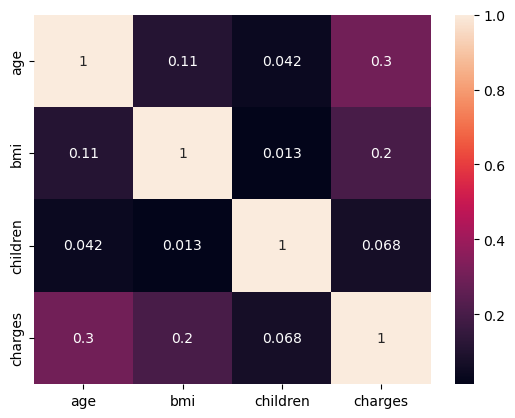

In [136]:
my_corr_data = data.corr()
sns.heatmap(my_corr_data, annot= True)

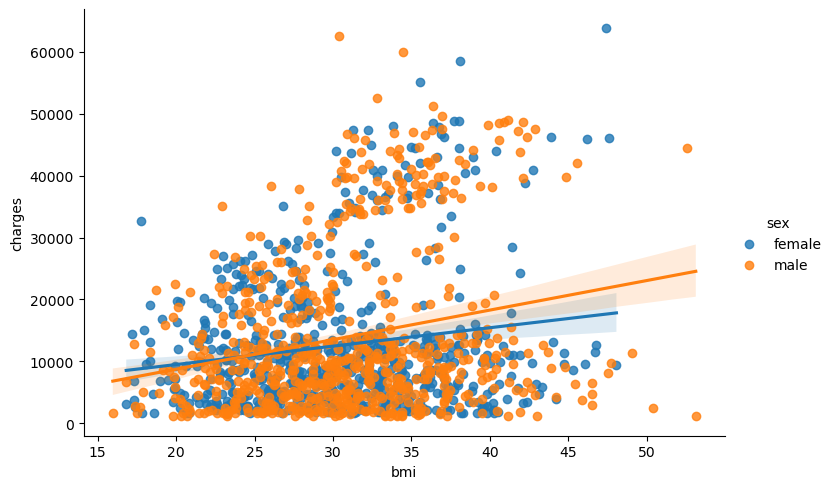

In [137]:
#see for exemple the correlation between sex and charge
sns.lmplot(x='bmi',y='charges',hue='sex',data=data,aspect=1.5,height=5)

Weirdly we see that being a female means that you can get more charged than a male.

#### Using all of this we can see that :
- The dataset, shaped as (1338,7), comprises 1338 individual patient entries (rows) and 7 attributes (columns).
- 'Charges' is the target variable we aim to predict, while the other six (age, sex, BMI, children, smoker, and region) are the independent variables used for prediction.
- Given the presence of multiple independent variables, a Multiple Linear Regression model is needed to best predict the 'charges' based on these variables.

### Function that split and train the model

In [138]:
def compute(model, data):
    X = data.drop('charges',axis=1) # Independet variable
    y = data['charges'] # dependent variable
    X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.3,random_state=1)
    
    # model
    model.fit(X_train, y_train)
    model.predict(X_train)
    my_score = model.score(X_train, y_train)
    
    return my_score

### Data processing

As ML algorithms doesn't work with categorical data directly we need to turn it into numerical values. For these we have three possibilities: "Dummy variable", "Label Encoding" and "One hot encoding"

Do do all of them we will use the get_dummies 

In [140]:
# get dummies for categorical columns
data = pd.get_dummies(data, columns = ['sex', 'smoker', 'region'],drop_first =True,
              dtype='int8')
data.head()

,age,bmi,children,charges,sex_male,smoker_yes,region_northwest,region_southeast,region_southwest
0,19,27.900,0,16884.92400,0,1,0,0,1
1,18,33.770,1,1725.55230,1,0,0,1,0
2,28,33.000,3,4449.46200,1,0,0,1,0
3,33,22.705,0,21984.47061,1,0,1,0,0
4,32,28.880,0,3866.85520,1,0,1,0,0


In [141]:
print(data.columns.values)

['age' 'bmi' 'children' 'charges' 'sex_male' 'smoker_yes'
 'region_northwest' 'region_southeast' 'region_southwest']


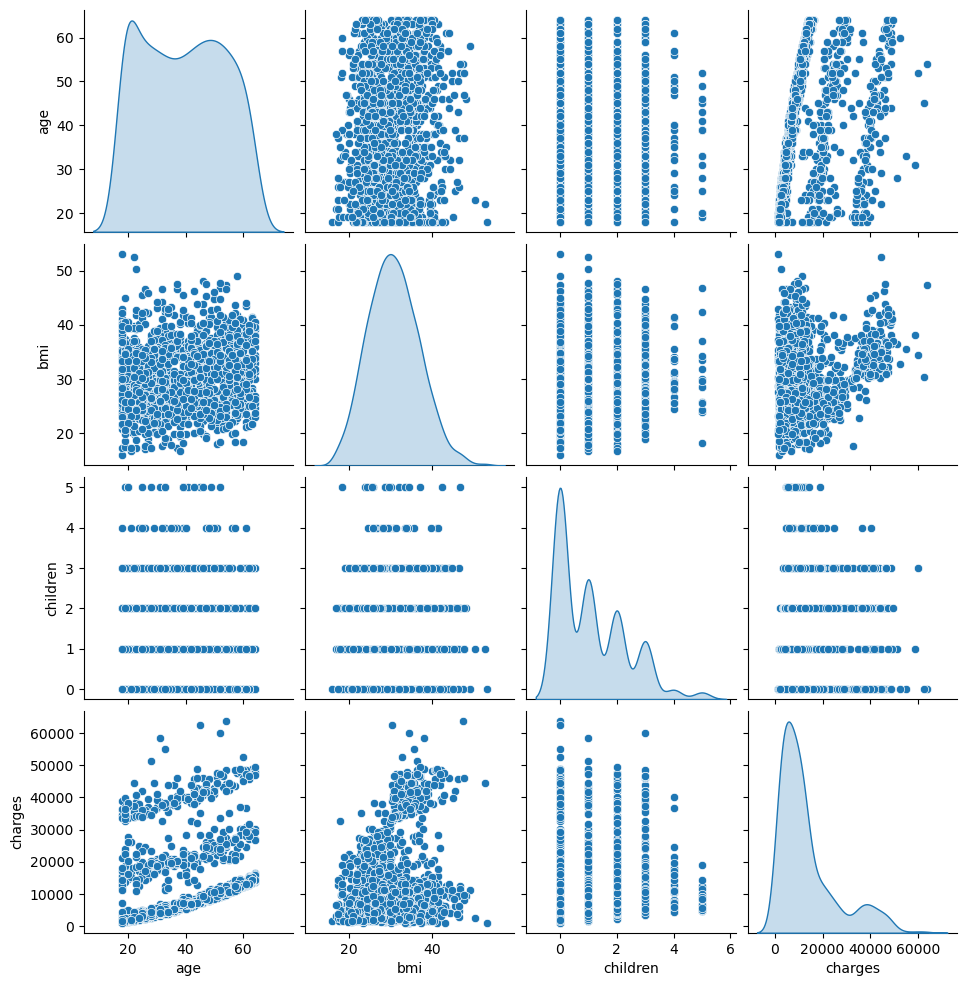

In [142]:
sns.pairplot(data.iloc[:, 0:4], diag_kind = 'kde')

### Estimator for data with preprocessing

In [143]:
compute(LinearRegression(), data)

0.7545557492633161